In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Array to hold sentiment
sentiments = []

In [3]:
target_users = ['@BBC', '@CBS', '@CNN', '@Foxnews', 'NYT']
compound_array = []
pos_array = []
neg_array = []
neu_array = []

In [8]:

for user in target_users:
    # Obtain tweets
    public_tweets = api.search(user, count=500, result_type="recent")
    
    # Perform sentiment analysis 
    sent_results = [analyzer.polarity_scores(tweet['text']) for tweet in public_tweets['statuses']]
    
    # Get individual sentiments
    compound = [tweet['compound'] for tweet in sent_results]
    comp_dict = {user:compound}
    compound_array.append(comp_dict)
    
    pos = [tweet['pos'] for tweet in sent_results]
    pos_dict = {user:compound}
    pos_array.append(pos_dict)
    
    neg = [tweet['neg'] for tweet in sent_results]
    neg_dict = {user:compound}
    neg_array.append(neg_dict)
    
    neu = [tweet['neu'] for tweet in sent_results]
    neu_dict = {user:compound}
    neu_array.append(neu_dict)

In [13]:

# Compound scores dataframe for each media source# Compou 

df = []
for x in np.arange(0,len(compound_array)):
    compound_df = pd.DataFrame(compound_array[x])
    df.append(compound_df)

result = pd.concat(df, axis=1)
result.head()

,@BBC,@CBS,@CNN,@Foxnews,NYT
0,0.0000,0.0000,-0.0772,0.7096,0.0000
1,0.0000,0.5983,0.0000,0.0000,0.5994
2,-0.6808,0.0000,0.0000,0.0000,0.0000
3,-0.4184,0.0000,-0.2960,0.0000,0.0000
4,0.0000,0.0000,0.3612,0.7845,0.3612


In [14]:
# Convert sentiments to DataFrame# Conve 
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.head()

,Compound,Date,Negative,Neutral,Positive,Text,Tweets Ago,User
0,0.0000,Sat Jun 09 20:04:00 +0000 2018,0.000,1.000,0.000,Would you describe yourself as a feminist?\n#H...,1,BBC
1,0.3612,Sat Jun 09 19:02:05 +0000 2018,0.000,0.878,0.122,What is it like being Germaine Greer? This obs...,2,BBC
2,0.0000,Sat Jun 09 18:04:03 +0000 2018,0.000,1.000,0.000,The cast of @QueerEye brought a bag of goodies...,3,BBC
3,0.5719,Sat Jun 09 17:01:05 +0000 2018,0.000,0.829,0.171,One hundred years after some women won the rig...,4,BBC
4,0.4019,Sat Jun 09 16:04:03 +0000 2018,0.156,0.623,0.222,"A year on from the Grenfell Tower fire, Sean a...",5,BBC


In [15]:
# Export data in dataframe into a csv file# Expor 
sentiments_pd.to_csv("api_news.csv", index=False)

In [16]:

# Create dataframe with average scores for every media source# Create 
df = []
positive_df = []
negative_df = []
neutral_df = []
for x in np.arange(0,len(compound_array)):
    compound_df = pd.DataFrame(compound_array[x])
    pos_df = pd.DataFrame(pos_array[x])
    neg_df = pd.DataFrame(neg_array[x])
    neu_df = pd.DataFrame(neu_array[x])
    
    df.append(compound_df)
    positive_df.append(pos_df)
    negative_df.append(neg_df)
    neutral_df.append(neu_df)
    
compound_results = pd.concat(df, axis=1)
compound_mean = pd.DataFrame(np.mean(compound_results)).reset_index()
compound_mean.columns.values[1] = 'Avg Compound Score'

pos_results = pd.concat(positive_df, axis=1)
pos_mean = pd.DataFrame(np.mean(pos_results)).reset_index()
pos_mean.columns.values[1] = 'Avg Pos Score'

neg_results = pd.concat(negative_df, axis=1)
neg_mean = pd.DataFrame(np.mean(neg_results)).reset_index()
neg_mean.columns.values[1] = 'Avg Neg Score'

neu_results = pd.concat(neutral_df, axis=1)
neu_mean = pd.DataFrame(np.mean(neu_results)).reset_index()
neu_mean.columns.values[1] = 'Avg Neu Score'

comp_pos = compound_mean.merge(pos_mean, how = 'outer', on = 'index')
neg_neu = neg_mean.merge(neu_mean, how = 'outer', on = 'index')
avg_scores = comp_pos.merge(neg_neu, how = 'outer', on = 'index')

avg_scores.columns.values[0] = "Media Source"

avg_scores

,Media Source,Avg Compound Score,Avg Pos Score,Avg Neg Score,Avg Neu Score
0,@BBC,-0.077627,-0.077627,-0.077627,-0.077627
1,@CBS,0.179845,0.179845,0.179845,0.179845
2,@CNN,-0.106096,-0.106096,-0.106096,-0.106096
3,@Foxnews,-0.056119,-0.056119,-0.056119,-0.056119
4,NYT,0.077491,0.077491,0.077491,0.077491


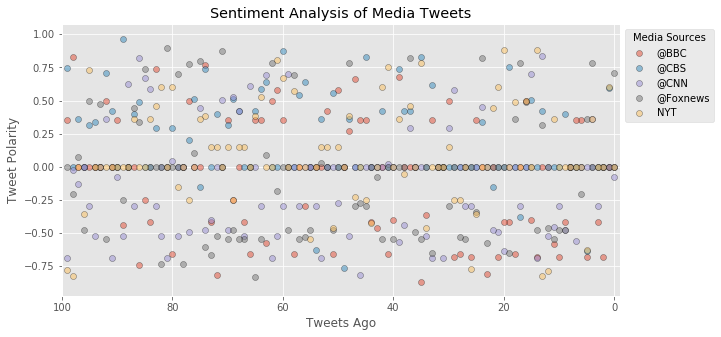

In [17]:

# Scatter showing compound score for all media sources# Scatte 
tweet_ago = np.arange(0,len(result))
plt.figure(figsize=(10,5))
plt.title("Sentiment Analysis of Media Tweets")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.xlim(len(result), -1)
[plt.scatter(tweet_ago,result[user],marker = "o",edgecolors="black", alpha='0.5') for user in result]
plt.legend(bbox_to_anchor=(1,1), loc='upper left', ncol=1, title="Media Sources")
plt.show()

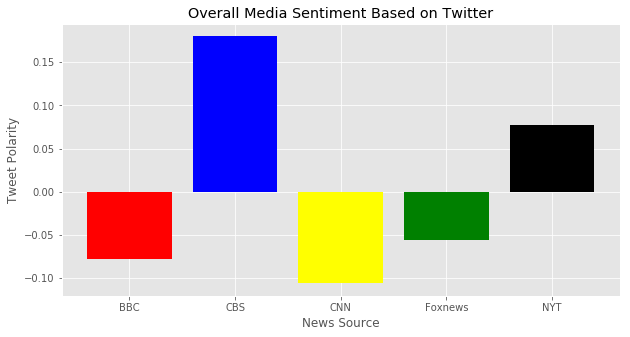

In [18]:
# Average compound score for bar graph
results_mean = np.mean(result)
tweet_ago = np.arange(0,len(results_mean))
plt.figure(figsize=(10,5))
plt.title("Overall Media Sentiment Based on Twitter")
plt.xlabel("News Source")
plt.ylabel("Tweet Polarity")
labels = [user.replace("@","") for user in target_users]
plt.xticks(tweet_ago, labels)
colors = ['red', 'blue', 'yellow', 'green', 'black']
plt.bar(tweet_ago,results_mean, color=colors) 
plt.show()

In [ ]:
#Written Trends
#1. CBS has a larger tweet polarity/most positive. 
#2. Most tweets have a compound score near 0. 
#3. CNN & BBC have the most negative tweets amongst the news sources.